![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [2]:
import tensorflow as tf

# tf.compat.v1.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

2022-09-25 16:45:27.354346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-25 16:45:28.206611: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-25 16:45:30.260101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-25 16:45:30.260277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Using TensorFlow version 2.10.0


# Task 2: The Dataset
### Import MNIST

In [7]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print("x_train size :", len(x_train))
print("y_train size :", len(y_train))
print("x_test  size :", len(x_test))
print("y_test  size :", len(y_test))

x_train size : 60000
y_train size : 60000
x_test  size : 10000
y_test  size : 10000


### Shapes of Imported Arrays

In [5]:
print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)
print('x_test  shape :', x_test.shape)
print('y_test  shape :', y_test.shape) 

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test  shape : (10000, 28, 28)
y_test  shape : (10000,)


### Plot an Image Example

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

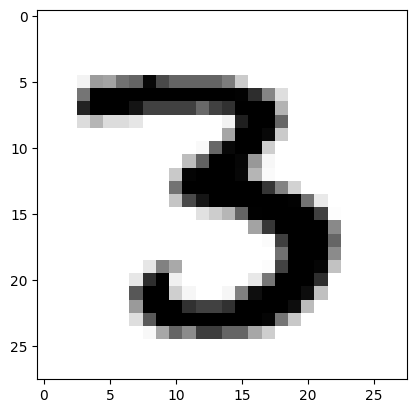

Class Label :  3


In [7]:
test_image=12

# Showing Input
plt.imshow(x_train[test_image], cmap="binary")
plt.show()

# Showing Output (Class)
print("Class Label : ", y_train[test_image])

### Display Labels

In [8]:
print("y_train classes :",set(y_train))
print("y_test  classes :",set(y_test))

y_train classes : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_test  classes : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded  = to_categorical(y_test)

### Validated Shapes

In [10]:
# Without Encoded Shape
print('y_train shape :', y_train.shape)
print('y_test  shape :', y_test.shape)

# Encoded Shape
print('y_train_encoded shape :', y_train_encoded.shape)
print('y_test_encoded  shape :', y_test_encoded.shape)

y_train shape : (60000,)
y_test  shape : (10000,)
y_train_encoded shape : (60000, 10)
y_test_encoded  shape : (10000, 10)


### Display Encoded Labels

In [11]:
print("y_train :", y_train_encoded[12], "--->", y_train[12])
print("y_test  :", y_test_encoded[12], "--->", y_test[12])

y_train : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] ---> 3
y_test  : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] ---> 9


# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [12]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped  = np.reshape(x_test, (10000, 784))

In [13]:
print("x_train shape : ", x_train.shape)
print("x_test  shape : ", x_test.shape)
print("x_train_reshaped shape : ", x_train_reshaped.shape)
print("x_test_reshaped  shape : ", x_test_reshaped.shape)

x_train shape :  (60000, 28, 28)
x_test  shape :  (10000, 28, 28)
x_train_reshaped shape :  (60000, 784)
x_test_reshaped  shape :  (10000, 784)


### Display Pixel Values

In [14]:
print(set(x_train_reshaped[12]))

{0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 22, 23, 24, 25, 30, 33, 35, 45, 48, 49, 50, 52, 53, 54, 55, 58, 61, 63, 66, 67, 73, 74, 75, 86, 88, 90, 91, 99, 101, 103, 116, 118, 122, 125, 126, 127, 131, 137, 138, 140, 141, 142, 150, 152, 153, 154, 155, 158, 166, 168, 181, 182, 188, 189, 190, 191, 192, 194, 200, 202, 205, 209, 210, 220, 224, 234, 235, 241, 242, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}


### Data Normalization

In [16]:
x_mean = np.mean(x_train_reshaped)
x_std  = np.mean(x_train_reshaped)

epsilon = 1e-10
# if the values of x_std is too low will not effect data to be normalized so we add epsilon to help for better normalization

# For Training dataset :
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)

# For Testing dataset :
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [25]:
print(set(x_train_norm[12]))

{-0.9999999999969986, -0.6398388795779748, 1.731221829847265, 3.2619065916281156, 1.9713292434599472, 3.652081138748725, 6.3833029685929885, 4.4624436596915285, 2.9317588979106772, 3.1418528848217746, 6.6234103822056705, 6.5633835288025, 5.302819607335917, 6.05315527487555, 5.062712193723234, 6.413316395294574, 3.5920542853455544, 4.822604780110552, 6.443329821996159, 0.050469934558487375, 6.653423808907256, 6.2632492617866475, 2.7516783377011653, 3.982228832466163, 0.5006713350822671, -0.7298791596827308, 2.5415843507900684, 3.562040858643969, 5.60295387435177, 5.002685340320064, 6.023141848173965, 6.233235835085062, -0.3397046125621217, 0.8908458822028762, -0.5497985994732189, 1.7012084031456796, -0.3096911858605364, 0.3506042015743405, 0.4406444816790965, 3.742121418853481, 4.762577926707381, 2.0913829502662886, 3.111839458120189, 2.4815574973868975, 4.732564500005796, 0.7407787486949496, 5.152752473827991, 6.593396955504086, -0.00955691884468325, 1.2510070026219, 3.5020140052407984

# Task 6: Creating a Model
### Creating the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [28]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [29]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3


2022-09-25 18:35:56.569157: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2886 - accuracy: 0.9130
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1346 - accuracy: 0.9592
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0974 - accuracy: 0.9709


### Evaluating the Model

In [31]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test dataset accuracy :', accuracy*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.1038 - accuracy: 0.9677
Test dataset accuracy : 96.77000045776367


# Task 8: Predictions

### Predictions on Test Set

### Plotting the Results